In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "../../Starter_Code/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "../../Starter_Code/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_results = pd.merge(study_results, mouse_metadata, on='Mouse ID')

#sort data by Timepoint and reset indices
mouse_results = mouse_results.sort_values(by = 'Timepoint')
mouse_results.reset_index(drop=True, inplace=True)

# Display the data table for preview
mouse_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,w584,0,45.0,0,Infubinol,Male,3,29
2,p136,0,45.0,0,Zoniferol,Female,5,28
3,a411,0,45.0,0,Ramicane,Male,3,22
4,b447,0,45.0,0,Ceftamin,Male,2,30


In [2]:
# Checking the number of mice.
count = mouse_results["Mouse ID"].nunique()
count

249

In [3]:
mouse_results.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
dtype: object

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
unique = []
dup = []
for i in range(0, 250):
    if mouse_results['Mouse ID'][i] not in unique:
        unique.append(mouse_results['Mouse ID'][i])
    else:
        dup.append(mouse_results['Mouse ID'][i])

dup_df = pd.DataFrame()
dup_df['Mouse ID']=dup

dup_df['Mouse ID'].unique()
#print(f'array({dup}, dtype= {}

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse = mouse_results[mouse_results['Mouse ID']=='g989']
dup_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
229,g989,0,45.000000,0,Propriva,Female,21,26
232,g989,0,45.000000,0,Propriva,Female,21,26
277,g989,5,47.570392,0,Propriva,Female,21,26
335,g989,5,48.786801,0,Propriva,Female,21,26
599,g989,10,49.880528,0,Propriva,Female,21,26
600,g989,10,51.745156,0,Propriva,Female,21,26
736,g989,15,51.325852,1,Propriva,Female,21,26
742,g989,15,53.442020,0,Propriva,Female,21,26
1080,g989,20,54.657650,1,Propriva,Female,21,26
1102,g989,20,55.326122,1,Propriva,Female,21,26


In [6]:
mouse_results = mouse_results.loc[(
    mouse_results["Mouse ID"] != 'g989')]
mouse_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,w584,0,45.0,0,Infubinol,Male,3,29
2,p136,0,45.0,0,Zoniferol,Female,5,28
3,a411,0,45.0,0,Ramicane,Male,3,22
4,b447,0,45.0,0,Ceftamin,Male,2,30


In [7]:
mouse_results["Mouse ID"].nunique()

248

In [8]:
tumor_volume = mouse_results['Tumor Volume (mm3)'].value_counts()
tumor_volume.head()

45.000000    248
41.680791      1
47.622816      1
43.013681      1
63.440686      1
Name: Tumor Volume (mm3), dtype: int64

In [9]:
tumor_group = mouse_results.groupby(['Drug Regimen'])
tumor_group.count()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,148,148,148,148,148,148,148
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [17]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
grouped = mouse_results.groupby(['Drug Regimen'])
# mean of the tumor volume.
mean = grouped['Tumor Volume (mm3)'].mean()
# median of the tumor volume.
median = grouped['Tumor Volume (mm3)'].median()
# variance of the tumor volume.
var = grouped['Tumor Volume (mm3)'].var()
# standard deviation of the tumor volume.
std = grouped['Tumor Volume (mm3)'].std()
# SEM of the tumor volume. 
sem = grouped['Tumor Volume (mm3)'].apply(lambda x: st.sem(x))

# Combine summary statistics into a single dataframe
tumor_summary = pd.concat([mean, median, var, std, sem], axis=1, keys=['Mean', 'Median', 'Variance', 'Std', 'SEM'])

# Print the summary statistics
tumor_summary

,Mean,Median,Variance,Std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
tumor_summary_agg = mouse_results.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg([np.mean, np.median, np.var, np.std, st.sem])
tumor_summary_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


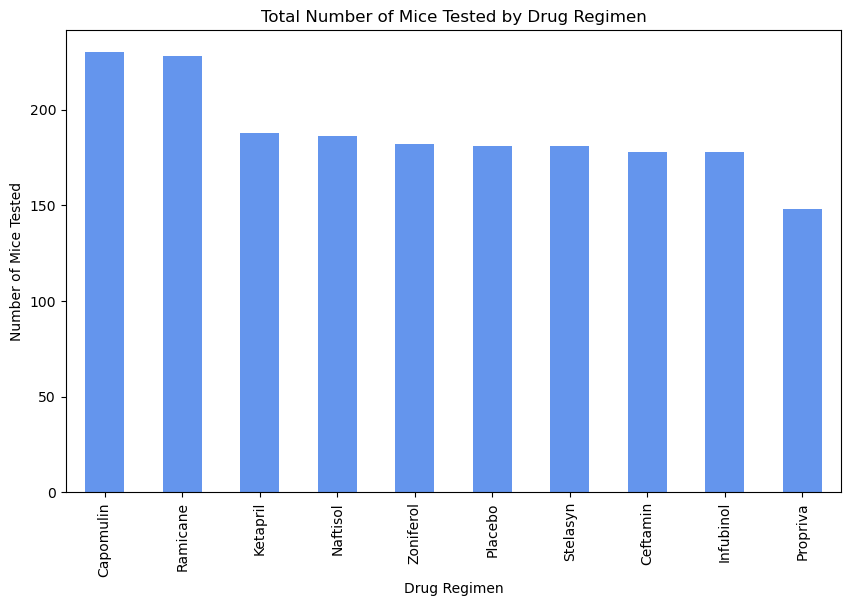

In [47]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

timepoints = mouse_results.groupby('Drug Regimen')['Timepoint'].count().sort_values(ascending=False)

# create a bar plot
plt.figure(figsize=(10,6))
ax = timepoints.plot(kind='bar', color='cornflowerblue')

# set the plot title and axes labels
ax.set_title('Total Number of Mice Tested by Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Number of Mice Tested')

# set the x-tick labels to the drug regimen names in the sorted order
ax.set_xticklabels(timepoints.index.tolist())

# show the plot
plt.show()

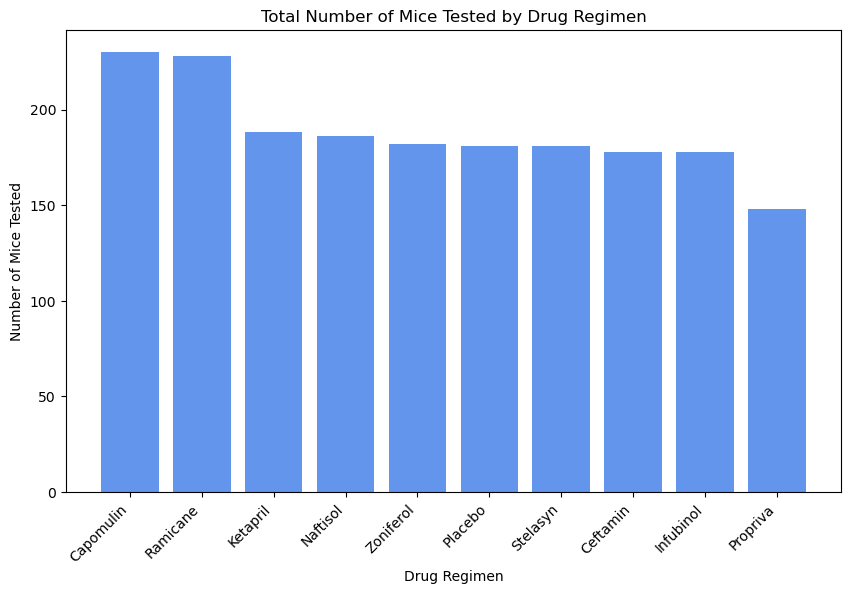

In [48]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

timepoints = mouse_results.groupby('Drug Regimen')['Timepoint'].count().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10,6))
plt.bar(x=timepoints.index, height=timepoints, color='cornflowerblue')

# Set the plot title and axes labels
plt.title('Total Number of Mice Tested by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')

# Set the x-tick labels to the drug regimen names in the sorted order
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

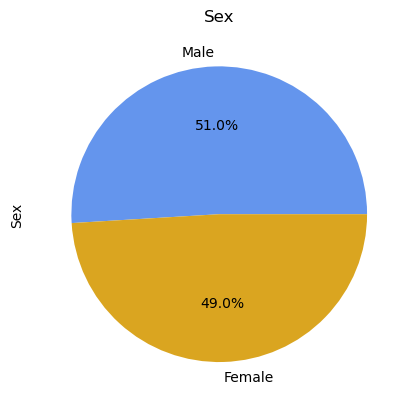

In [52]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
count_sex = mouse_results['Sex'].value_counts()

#create pie chart
count_sex.plot(kind='pie', autopct='%1.1f%%', startangle=0, colors=['cornflowerblue', 'goldenrod'])

# set the plot title
plt.title('Sex')

# show the plot
plt.show()

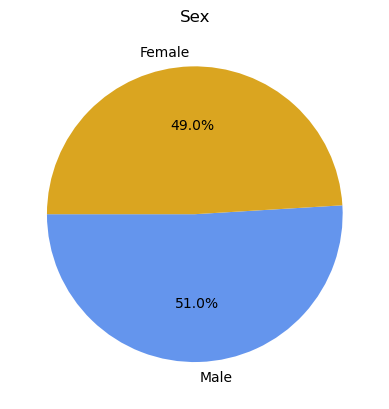

In [54]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
count_sex = mouse_results['Sex'].value_counts()

# Create a pie chart 
plt.pie(count_sex, labels=count_sex.index, autopct='%1.1f%%', startangle=180, colors=['cornflowerblue', 'goldenrod'])

# Set the plot title
plt.title('Sex')

# Show the plot
plt.show()

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

In [ ]:
# Put treatments into a list for a for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

